In [1]:
import new_pipe
import has_violation

import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

In [2]:
df = has_violation.go()  # this is the features dataframe

/Users/rachelwhaley/Documents/MPCS/30254-MLPP/project/epa-rcra-violations/full_pipeline_files/has_violation.py:70: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  prev_vios = pd.concat([prev_vios, vios_this_yr], ignore_index=True)


In [3]:
df.shape

(8330032, 43)

In [4]:
features_df = new_pipe.add_acs_features(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8330032 entries, 0 to 8330031
Data columns (total 44 columns):
ID_NUMBER                              object
YEAR_EVALUATED                         int64
HasViolation                           float64
DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER     float64
DAYS_SINCE_VIOLATIONS_IN_STATE_CODE    float64
DAYS_SINCE_VIOLATIONS_IN_ZIP_CODE      float64
NUMBER_VIOLATIONS_IN_ID_NUMBER         float64
NUMBER_VIOLATIONS_IN_STATE_CODE        float64
NUMBER_VIOLATIONS_IN_ZIP_CODE          float64
IsLQG                                  int64
IsTSDF                                 int64
NumInMyState                           float64
NumInMyZIP                             float64
early  ID_NUMBER avg                   float64
early  ID_NUMBER sum                   float64
early  ID_NUMBER count                 float64
last early  ID_NUMBER                  float64
early  ZIP_CODE avg                    float64
early  ZIP_CODE sum                    float64
e

In [7]:
import pandas as pd
import epa_pipeline as ep

In [9]:
def add_acs_features(df):
    acs = pd.read_csv('all_acs_data.csv')
    acs['median income'].fillna(0, inplace=True)
    acs['median income'] = acs['median income'].apply(lambda x: x if x > 0
                                                         else 0)
    df['acs_year'] = df['YEAR_EVALUATED'].where(df['YEAR_EVALUATED'] < 2017,
                                                   2016)
    df = df.merge(acs, left_on=['ID_NUMBER', 'acs_year'], right_on=['ID_NUMBER',
                                                                       'year'], how="left")
    df.drop('acs_year', axis=1, inplace=True)
    df.fillna(0, inplace=True)
    return df

In [10]:
acs_added_df = add_acs_features(df)

In [11]:
acs_added_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8330032 entries, 0 to 8330031
Data columns (total 70 columns):
ID_NUMBER                              object
YEAR_EVALUATED                         int64
HasViolation                           float64
DAYS_SINCE_VIOLATIONS_IN_ID_NUMBER     float64
DAYS_SINCE_VIOLATIONS_IN_STATE_CODE    float64
DAYS_SINCE_VIOLATIONS_IN_ZIP_CODE      float64
NUMBER_VIOLATIONS_IN_ID_NUMBER         float64
NUMBER_VIOLATIONS_IN_STATE_CODE        float64
NUMBER_VIOLATIONS_IN_ZIP_CODE          float64
IsLQG                                  int64
IsTSDF                                 int64
NumInMyState                           float64
NumInMyZIP                             float64
early  ID_NUMBER avg                   float64
early  ID_NUMBER sum                   float64
early  ID_NUMBER count                 float64
last early  ID_NUMBER                  float64
early  ZIP_CODE avg                    float64
early  ZIP_CODE sum                    float64
e

In [12]:
preds = pd.read_csv("predictions1.csv")

In [13]:
preds.shape

(1042512, 17)

In [17]:
preds_all = preds.merge(acs_added_df, left_index=True, right_index=True)

In [18]:
preds_all.shape

(1042512, 87)

In [19]:
preds_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042512 entries, 0 to 1042511
Data columns (total 87 columns):
Unnamed: 0_x                                                                                                       1042512 non-null int64
DT{'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 1}_at_0.2pct                                          1042512 non-null int64
truth                                                                                                              1042512 non-null float64
DT{'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 5}_at_0.2pct                                          1042512 non-null int64
truth.1                                                                                                            1042512 non-null float64
DT{'min_samples_split': 2, 'criterion': 'gini', 'max_depth': None}_at_0.2pct                                       1042512 non-null int64
truth.2                                                

In [20]:
preds_all.fillna(0, inplace=True)

In [21]:
preds_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042512 entries, 0 to 1042511
Data columns (total 87 columns):
Unnamed: 0_x                                                                                                       1042512 non-null int64
DT{'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 1}_at_0.2pct                                          1042512 non-null int64
truth                                                                                                              1042512 non-null float64
DT{'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 5}_at_0.2pct                                          1042512 non-null int64
truth.1                                                                                                            1042512 non-null float64
DT{'min_samples_split': 2, 'criterion': 'gini', 'max_depth': None}_at_0.2pct                                       1042512 non-null int64
truth.2                                                

In [22]:
preds_all["families_under_poverty_line"] = preds_all["under_p5_x"] + preds_all["p5top74"] + preds_all["p75top99"] 

In [40]:
rf_for_aequitas = preds_all.filter(["RF{'min_samples_split': 10, 'max_depth': 5, 'n_estimators': 10, 'n_jobs': -1, 'max_features': 'sqrt'}_at_0.2pct", "truth.7", "median income", "black alone", "native alone", "families_under_poverty_line"])

In [41]:
rf_for_aequitas.shape

(1042512, 6)

In [42]:
rf_for_aequitas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042512 entries, 0 to 1042511
Data columns (total 6 columns):
RF{'min_samples_split': 10, 'max_depth': 5, 'n_estimators': 10, 'n_jobs': -1, 'max_features': 'sqrt'}_at_0.2pct    1042512 non-null int64
truth.7                                                                                                            1042512 non-null float64
median income                                                                                                      1042512 non-null float64
black alone                                                                                                        1042512 non-null float64
native alone                                                                                                       1042512 non-null float64
families_under_poverty_line                                                                                        1042512 non-null float64
dtypes: float64(5), int64(1)
memory usage: 55.7 MB

In [43]:
rf_for_aequitas = rf_for_aequitas.rename(columns={"RF{'min_samples_split': 10, 'max_depth': 5, 'n_estimators': 10, 'n_jobs': -1, 'max_features': 'sqrt'}_at_0.2pct": "score", "truth.7":"label_value"})


In [44]:
rf_for_aequitas["label_value"] = rf_for_aequitas["label_value"].astype(int)

In [45]:
g = Group()
import aequitas.preprocessing as ap

In [46]:
rf_for_aequitas_ready, lst = ap.preprocess_input_df(rf_for_aequitas)

In [47]:
rf_for_aequitas_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042512 entries, 0 to 1042511
Data columns (total 6 columns):
score                          1042512 non-null int64
label_value                    1042512 non-null int64
median income                  1042512 non-null object
black alone                    1042512 non-null object
native alone                   1042512 non-null object
families_under_poverty_line    1042512 non-null object
dtypes: int64(2), object(4)
memory usage: 55.7+ MB


In [48]:
xtab, _ = g.get_crosstabs(rf_for_aequitas_ready)

model_id, score_thresholds 1 {'rank_abs': [157238]}


In [49]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [50]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,1,binary 0/1,157238,median income,0.00-38630.75,38560,222068,37993,900,221168,567,1467,259161,260628,1042512
1,1,binary 0/1,157238,median income,38630.75-48889.00,39367,221320,38783,928,220392,584,1512,259175,260687,1042512
2,1,binary 0/1,157238,median income,48889.00-62800.00,39827,220806,39251,938,219868,576,1514,259119,260633,1042512
3,1,binary 0/1,157238,median income,62800.00-250001.00,39484,221080,38932,1004,220076,552,1556,259008,260564,1042512
4,1,binary 0/1,157238,black alone,0.00-0.00,40189,220441,39564,975,219466,625,1600,259030,260630,1042512
5,1,binary 0/1,157238,black alone,0.00-0.02,39335,221294,38731,941,220353,604,1545,259084,260629,1042512
6,1,binary 0/1,157238,black alone,0.02-0.08,39721,220923,39199,970,219953,522,1492,259152,260644,1042512
7,1,binary 0/1,157238,black alone,0.08-1.00,37993,222616,37465,884,221732,528,1412,259197,260609,1042512
8,1,binary 0/1,157238,native alone,0.00-0.00,77919,443356,76744,1900,441456,1175,3075,518200,521275,1042512
9,1,binary 0/1,157238,native alone,0.00-0.01,39307,221331,38781,908,220423,526,1434,259204,260638,1042512


In [51]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,median income,0.00-38630.75,0.39,0.85,0.0,0.99,0.15,0.61,1.0,0.01,0.25,0.15,0.01
1,median income,38630.75-48889.00,0.39,0.85,0.0,0.99,0.15,0.61,1.0,0.01,0.25,0.15,0.01
2,median income,48889.00-62800.00,0.38,0.85,0.0,0.99,0.15,0.62,1.0,0.01,0.25,0.15,0.01
3,median income,62800.00-250001.00,0.35,0.85,0.0,0.99,0.15,0.65,1.0,0.01,0.25,0.15,0.01
4,black alone,0.00-0.00,0.39,0.85,0.0,0.98,0.15,0.61,1.0,0.02,0.26,0.15,0.01
5,black alone,0.00-0.02,0.39,0.85,0.0,0.98,0.15,0.61,1.0,0.02,0.25,0.15,0.01
6,black alone,0.02-0.08,0.35,0.85,0.0,0.99,0.15,0.65,1.0,0.01,0.25,0.15,0.01
7,black alone,0.08-1.00,0.37,0.86,0.0,0.99,0.14,0.63,1.0,0.01,0.24,0.15,0.01
8,native alone,0.00-0.00,0.38,0.85,0.0,0.98,0.15,0.62,1.0,0.02,0.50,0.15,0.01
9,native alone,0.00-0.01,0.37,0.85,0.0,0.99,0.15,0.63,1.0,0.01,0.25,0.15,0.01


In [52]:
aqp = Plot()

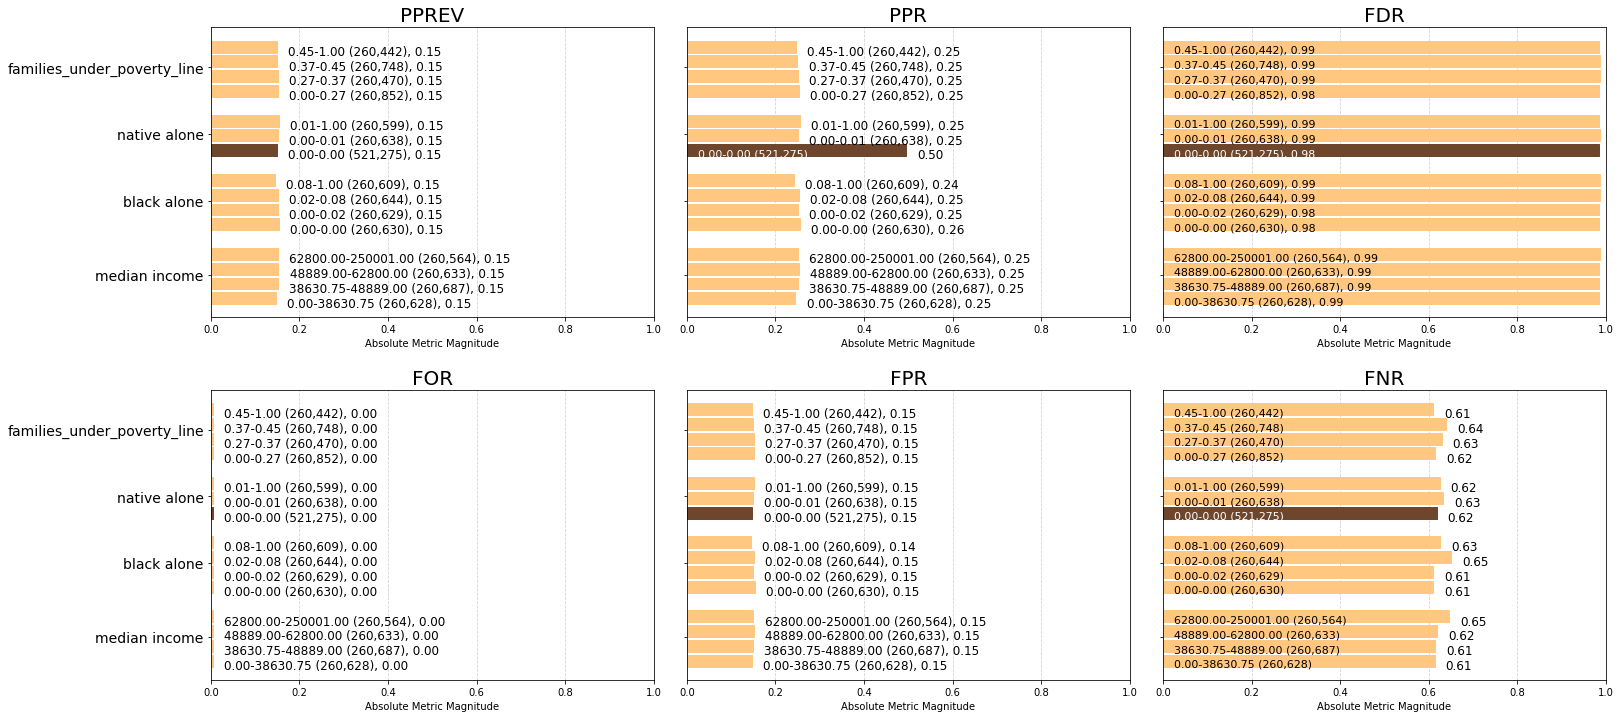

In [54]:
p = aqp.plot_group_metric_all(xtab, ncols=3)

In [55]:
b = Bias()

In [56]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, ref_groups_dict={'median income':'62800.00-250001.00', 'black alone':'0.00-0.00', 'native alone':'0.00-0.00', 'families_under_poverty_line':'0.00-0.27'}, alpha=0.05, mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,1,binary 0/1,157238,median income,0.00-38630.75,0.386503,0.8534,0.00405281,0.985296,0.1466,0.613497,0.995947,0.0147044,38560,222068,0.245233,0.14795,37993,900,221168,567,1467,259161,260628,1042512,0.00562871,0.976598,0.976358,1.05179,0.999266,0.892426,0.975305,0.950798,1.08949,1.00437,1.00049,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00
1,1,binary 0/1,157238,median income,38630.75-48889.00,0.386243,0.85036,0.00419302,0.985165,0.14964,0.613757,0.995807,0.0148348,39367,221320,0.250366,0.151013,38783,928,220392,584,1512,259175,260687,1042512,0.00580006,0.997037,0.996566,1.06112,0.999133,0.9233,0.995531,0.9512,1.08876,1.00079,1.00035,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00
2,1,binary 0/1,157238,median income,48889.00-62800.00,0.380449,0.848521,0.00424807,0.985537,0.151479,0.619551,0.995752,0.0144626,39827,220806,0.253291,0.152809,39251,938,219868,576,1514,259119,260633,1042512,0.00580893,1.00869,1.00842,1.03449,0.999511,0.935422,1.00776,0.96018,1.07243,0.998627,1.00029,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00
3,1,binary 0/1,157238,median income,62800.00-250001.00,0.354756,0.849688,0.00454134,0.98602,0.150312,0.645244,0.995459,0.0139803,39484,221080,0.25111,0.151533,38932,1004,220076,552,1556,259008,260564,1042512,0.00597166,1,1,1,1,1,1,1,1,1,1,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00,62800.00-250001.00
4,1,binary 0/1,157238,black alone,0.00-0.00,0.390625,0.847261,0.00442295,0.984448,0.152739,0.609375,0.995577,0.0155515,40189,220441,0.255593,0.154199,39564,975,219466,625,1600,259030,260630,1042512,0.00613897,1,1,1,1,1,1,1,1,1,1,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00
5,1,binary 0/1,157238,black alone,0.00-0.02,0.390939,0.850508,0.00425226,0.984645,0.149492,0.609061,0.995748,0.0153553,39335,221294,0.250162,0.150923,38731,941,220353,604,1545,259084,260629,1042512,0.00592797,0.97875,0.978754,0.987381,1.0002,0.961408,0.978741,0.999486,1.0008,1.00383,1.00017,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00
6,1,binary 0/1,157238,black alone,0.02-0.08,0.349866,0.848741,0.00439067,0.986858,0.151259,0.650134,0.995609,0.0131417,39721,220923,0.252617,0.152396,39199,970,219953,522,1492,259152,260644,1042512,0.00572428,0.988355,0.988302,0.84504,1.00245,0.992701,0.990308,1.06689,0.895657,1.00175,1.00003,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00
7,1,binary 0/1,157238,black alone,0.08-1.00,0.373938,0.855457,0.00397096,0.986103,0.144543,0.626062,0.996029,0.0138973,37993,222616,0.241627,0.145785,37465,884,221732,528,1412,259197,260609,1042512,0.00541808,0.945358,0.945434,0.89363,1.00168,0.897808,0.946337,1.02738,0.95728,1.00967,1.00045,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00,0.00-0.00
8,1,binary 0/1,157238,native alone,0.00-0.00,0.38211

In [57]:
calculated_disparities = b.list_disparities(bdf)
disparity_significance = b.list_significance(bdf)

In [58]:
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median income,0.00-38630.75,0.976598,0.976358,1.051788,0.999266,0.892426,0.975305,0.950798,1.089491,1.004369,1.000491
1,median income,38630.75-48889.00,0.997037,0.996566,1.061115,0.999133,0.923300,0.995531,0.951200,1.088759,1.000791,1.000350
2,median income,48889.00-62800.00,1.008687,1.008420,1.034492,0.999511,0.935422,1.007762,0.960180,1.072425,0.998627,1.000295
3,median income,62800.00-250001.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,black alone,0.00-0.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,black alone,0.00-0.02,0.978750,0.978754,0.987381,1.000199,0.961408,0.978741,0.999486,1.000803,1.003832,1.000171
6,black alone,0.02-0.08,0.988355,0.988302,0.845040,1.002448,0.992701,0.990308,1.066887,0.895657,1.001747,1.000032
7,black alone,0.08-1.00,0.945358,0.945434,0.893630,1.001680,0.897808,0.946337,1.027384,0.957280,1.009674,1.000454
8,native alone,0.00-0.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,native alone,0.00-0.01,0.504460,1.008918,0.887404,1.001724,0.957288,1.010253,1.024774,0.959939,0.998218,1.000184


In [59]:
hbdf = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                         ref_groups_dict={'median income':'62800.00-250001.00', 'black alone':'0.00-0.00', 'native alone':'0.00-0.00', 'families_under_poverty_line':'0.00-0.27'},
                                         alpha=0.05,
                                         mask_significance=False)

get_disparity_predefined_group()


In [60]:
hbdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median income,0.00-38630.75,0.976598,0.976358,1.051788,0.999266,0.892426,0.975305,0.950798,1.089491,1.004369,1.000491
1,median income,38630.75-48889.00,0.997037,0.996566,1.061115,0.999133,0.923300,0.995531,0.951200,1.088759,1.000791,1.000350
2,median income,48889.00-62800.00,1.008687,1.008420,1.034492,0.999511,0.935422,1.007762,0.960180,1.072425,0.998627,1.000295
3,median income,62800.00-250001.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,black alone,0.00-0.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,black alone,0.00-0.02,0.978750,0.978754,0.987381,1.000199,0.961408,0.978741,0.999486,1.000803,1.003832,1.000171
6,black alone,0.02-0.08,0.988355,0.988302,0.845040,1.002448,0.992701,0.990308,1.066887,0.895657,1.001747,1.000032
7,black alone,0.08-1.00,0.945358,0.945434,0.893630,1.001680,0.897808,0.946337,1.027384,0.957280,1.009674,1.000454
8,native alone,0.00-0.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,native alone,0.00-0.01,0.504460,1.008918,0.887404,1.001724,0.957288,1.010253,1.024774,0.959939,0.998218,1.000184


In [61]:
majority_bdf = b.get_disparity_major_group(xtab, original_df=df, mask_significance=True)

get_disparity_major_group()


In [62]:
majority_bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median income,0.00-38630.75,0.979501,0.979722,0.991210,1.000132,0.966561,0.979683,0.999577,1.000672,1.003575,1.000141
1,median income,38630.75-48889.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,median income,48889.00-62800.00,1.011685,1.011895,0.974910,1.000378,1.013129,1.012286,1.009441,0.984998,0.997838,0.999945
3,median income,62800.00-250001.00,1.002972,1.003445,0.942405,1.000867,1.083071,1.004489,1.051303,0.918477,0.999210,0.999650
4,black alone,0.00-0.00,1.011782,1.011837,1.183375,0.997558,1.007352,1.009787,0.937307,1.116499,0.998256,0.999968
5,black alone,0.00-0.02,0.990282,0.990339,1.168443,0.997757,0.968477,0.988320,0.936824,1.117395,1.002082,1.000139
6,black alone,0.02-0.08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,black alone,0.08-1.00,0.956497,0.956625,1.057499,0.999234,0.904409,0.955598,0.962974,1.068803,1.007913,1.000422
8,native alone,0.00-0.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,native alone,0.00-0.01,0.504460,1.008918,0.887404,1.001724,0.957288,1.010253,1.024774,0.959939,0.998218,1.000184


In [63]:
min_metric_bdf = b.get_disparity_min_metric(df=xtab, original_df=df)

get_disparity_min_metric()


In [64]:
min_metric_bdf.style

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,ppr_ref_group_value,pprev_disparity,pprev_ref_group_value,precision_disparity,precision_ref_group_value,fdr_disparity,fdr_ref_group_value,for_disparity,for_ref_group_value,fpr_disparity,fpr_ref_group_value,fnr_disparity,fnr_ref_group_value,tpr_disparity,tpr_ref_group_value,tnr_disparity,tnr_ref_group_value,npv_disparity,npv_ref_group_value
0,1,binary 0/1,157238,median income,0.00-38630.75,0.386503,0.8534,0.00405281,0.985296,0.1466,0.613497,0.995947,0.0147044,38560,222068,0.245233,0.14795,37993,900,221168,567,1467,259161,260628,1042512,0.00562871,1,0.00-38630.75,1,0.00-38630.75,1.05179,62800.00-250001.00,1.00013,38630.75-48889.00,1,0.00-38630.75,1,0.00-38630.75,1,0.00-38630.75,1.08949,62800.00-250001.00,1.00575,48889.00-62800.00,1.00049,62800.00-250001.00
1,1,binary 0/1,157238,median income,38630.75-48889.00,0.386243,0.85036,0.00419302,0.985165,0.14964,0.613757,0.995807,0.0148348,39367,221320,0.250366,0.151013,38783,928,220392,584,1512,259175,260687,1042512,0.00580006,1.02093,0.00-38630.75,1.0207,0.00-38630.75,1.06112,62800.00-250001.00,1,38630.75-48889.00,1.0346,0.00-38630.75,1.02074,0.00-38630.75,1.00042,0.00-38630.75,1.08876,62800.00-250001.00,1.00217,48889.00-62800.00,1.00035,62800.00-250001.00
2,1,binary 0/1,157238,median income,48889.00-62800.00,0.380449,0.848521,0.00424807,0.985537,0.151479,0.619551,0.995752,0.0144626,39827,220806,0.253291,0.152809,39251,938,219868,576,1514,259119,260633,1042512,0.00580893,1.03286,0.00-38630.75,1.03284,0.00-38630.75,1.03449,62800.00-250001.00,1.00038,38630.75-48889.00,1.04818,0.00-38630.75,1.03328,0.00-38630.75,1.00987,0.00-38630.75,1.07243,62800.00-250001.00,1,48889.00-62800.00,1.00029,62800.00-250001.00
3,1,binary 0/1,157238,median income,62800.00-250001.00,0.354756,0.849688,0.00454134,0.98602,0.150312,0.645244,0.995459,0.0139803,39484,221080,0.25111,0.151533,38932,1004,220076,552,1556,259008,260564,1042512,0.00597166,1.02396,0.00-38630.75,1.02421,0.00-38630.75,1,62800.00-250001.00,1.00087,38630.75-48889.00,1.12054,0.00-38630.75,1.02532,0.00-38630.75,1.05175,0.00-38630.75,1,62800.00-250001.00,1.00137,48889.00-62800.00,1,62800.00-250001.00
4,1,binary 0/1,157238,black alone,0.00-0.00,0.390625,0.847261,0.00442295,0.984448,0.152739,0.609375,0.995577,0.0155515,40189,220441,0.255593,0.154199,39564,975,219466,625,1600,259030,260630,1042512,0.00613897,1.0578,0.08-1.00,1.05771,0.08-1.00,1.18338,0.02-0.08,1,0.00-0.00,1.11382,0.08-1.00,1.05671,0.08-1.00,1.00051,0.00-0.02,1.1165,0.02-0.08,1,0.00-0.00,1,0.00-0.00
5,1,binary 0/1,157238,black alone,0.00-0.02,0.390939,0.850508,0.00425226,0.984645,0.149492,0.609061,0.995748,0.0153553,39335,221294,0.250162,0.150923,38731,941,220353,604,1545,259084,260629,1042512,0.00592797,1.03532,0.08-1.00,1.03524,0.08-1.00,1.16844,0.02-0.08,1.0002,0.00-0.00,1.07084,0.08-1.00,1.03424,0.08-1.00,1,0.00-0.02,1.1174,0.02-0.08,1.00383,0.00-0.00,1.00017,0.00-0.00
6,1,binary 0/1,157238,black alone,0.02-0.08,0.349866,0.848741,0.00439067,0.986858,0.151259,0.650134,0.995609,0.0131417,39721,220923,0.252617,0.152396,39199,970,219953,522,1492,259152,260644,1042512,0.00572428,1.04548,0.08-1.00,1.04534,0.08-1.00,1,0.02-0.08,1.00245,0.00-0.00,1.10569,0.08-1.00,1.04646,0.08-1.00,1.06744,0.00-0.02,1,0.02-0.08,1.00175,0.00-0.00,1.00003,0.00-0.00
7,1,binary 0/1,157238,black alone,0.08-1.00,0.373938,0.855457,0.00397096,0.986103,0.144543,0.626062,0.996029,0.0138973,37993,222616,0.241627,0.145785,37465,884,221732,528,1412,259197,260609,1042512,0.00541808,1,0.08-1.00,1,0.08-1.00,1.0575,0.02-0.08,1.00168,0.00-0.00,1,0.08-1.00,1,0.08-1.00,1.02791,0.00-0.02,1.0688,0.02-0.08,1.00967,0.00-0.00,1.00045,0.00-0.00
8,1,binary 0/1,157238,native alone,0.00-0.00,0.382114,0.851903,0.0042855,0.98492,0.148097,0.617886,0.995715,0.0150798,77919,443356,0.495548,0.149478,76744,1900,441456,1175,3075,518200,521275,

In [65]:
min_metric_bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,median income,0.00-38630.75,1.000000,1.000000,1.051788,1.000132,1.000000,1.000000,1.000000,1.089491,1.005750,1.000491
1,median income,38630.75-48889.00,1.020928,1.020697,1.061115,1.000000,1.034596,1.020738,1.000423,1.088759,1.002167,1.000350
2,median income,48889.00-62800.00,1.032858,1.032838,1.034492,1.000378,1.048179,1.033279,1.009868,1.072425,1.000000,1.000295
3,median income,62800.00-250001.00,1.023963,1.024214,1.000000,1.000867,1.120541,1.025320,1.051748,1.000000,1.001375,1.000000
4,black alone,0.00-0.00,1.057800,1.057715,1.183375,1.000000,1.113823,1.056706,1.000515,1.116499,1.000000,1.000000
5,black alone,0.00-0.02,1.035322,1.035243,1.168443,1.000199,1.070839,1.034242,1.000000,1.117395,1.003832,1.000171
6,black alone,0.02-0.08,1.045482,1.045342,1.000000,1.002448,1.105694,1.046465,1.067436,1.000000,1.001747,1.000032
7,black alone,0.08-1.00,1.000000,1.000000,1.057499,1.001680,1.000000,1.000000,1.027913,1.068803,1.009674,1.000454
8,native alone,0.00-0.00,1.982319,1.000000,1.126883,1.000000,1.044618,1.000000,1.000000,1.041732,1.004863,1.000076
9,native alone,0.00-0.01,1.000000,1.008918,1.000000,1.001724,1.000000,1.010253,1.024774,1.000000,1.003072,1.000260


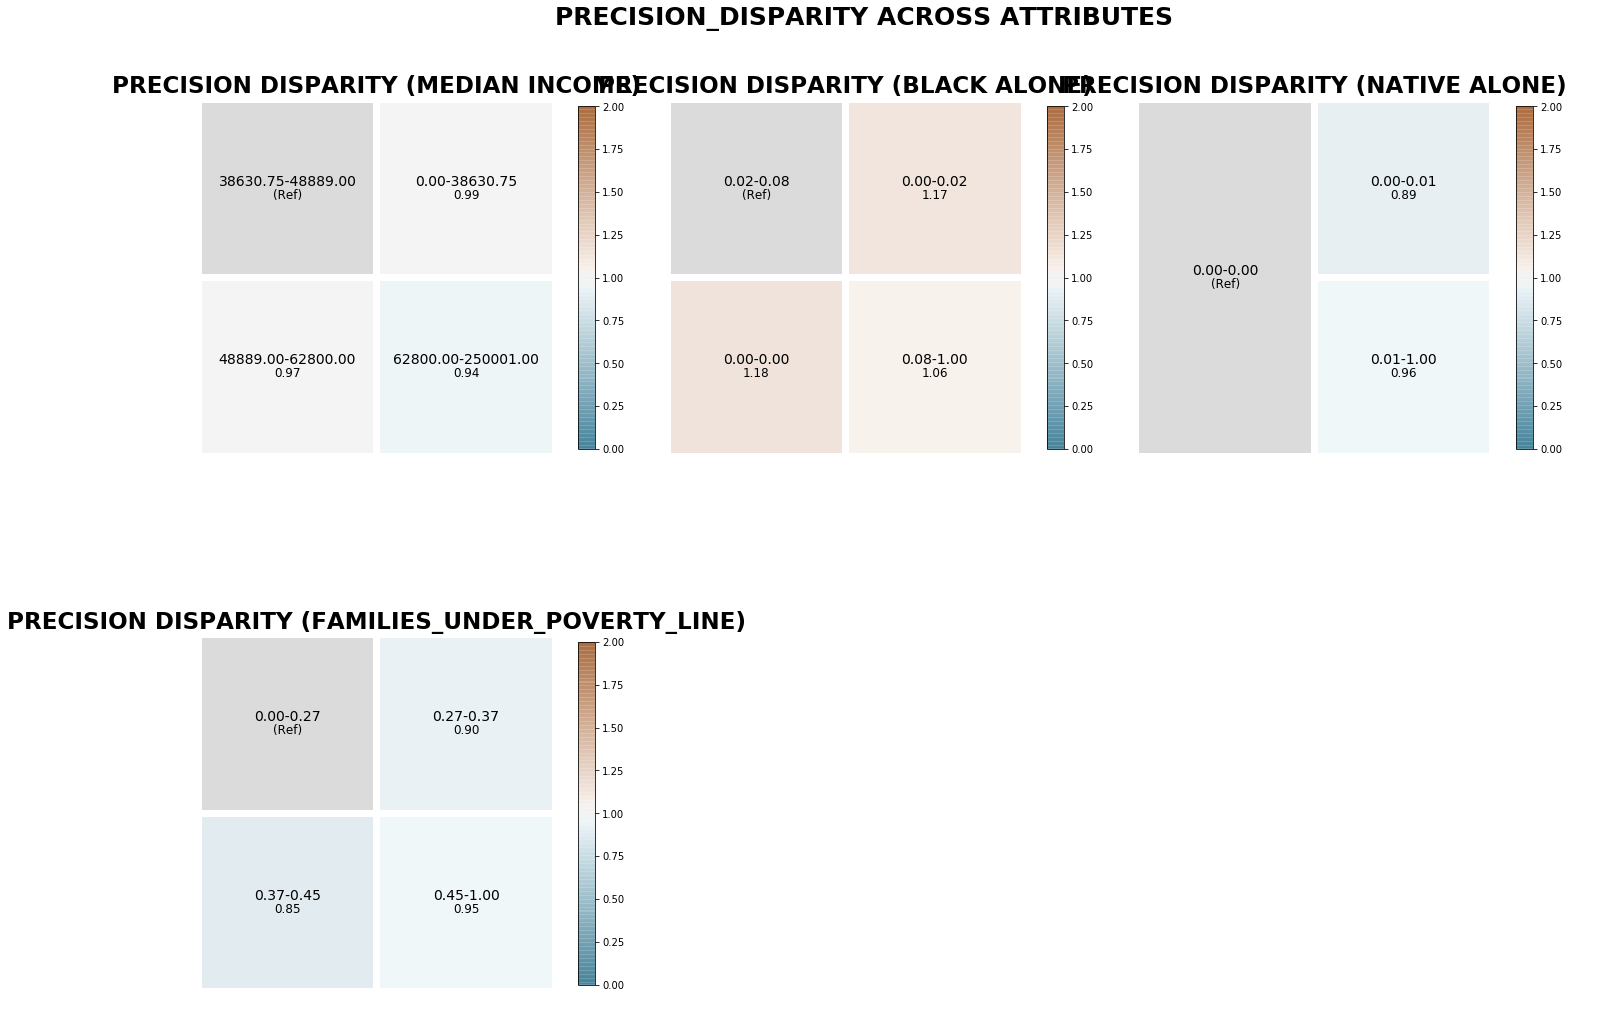

In [68]:
j = aqp.plot_disparity_all(majority_bdf, metrics=['precision_disparity'], significance_alpha=0.05)

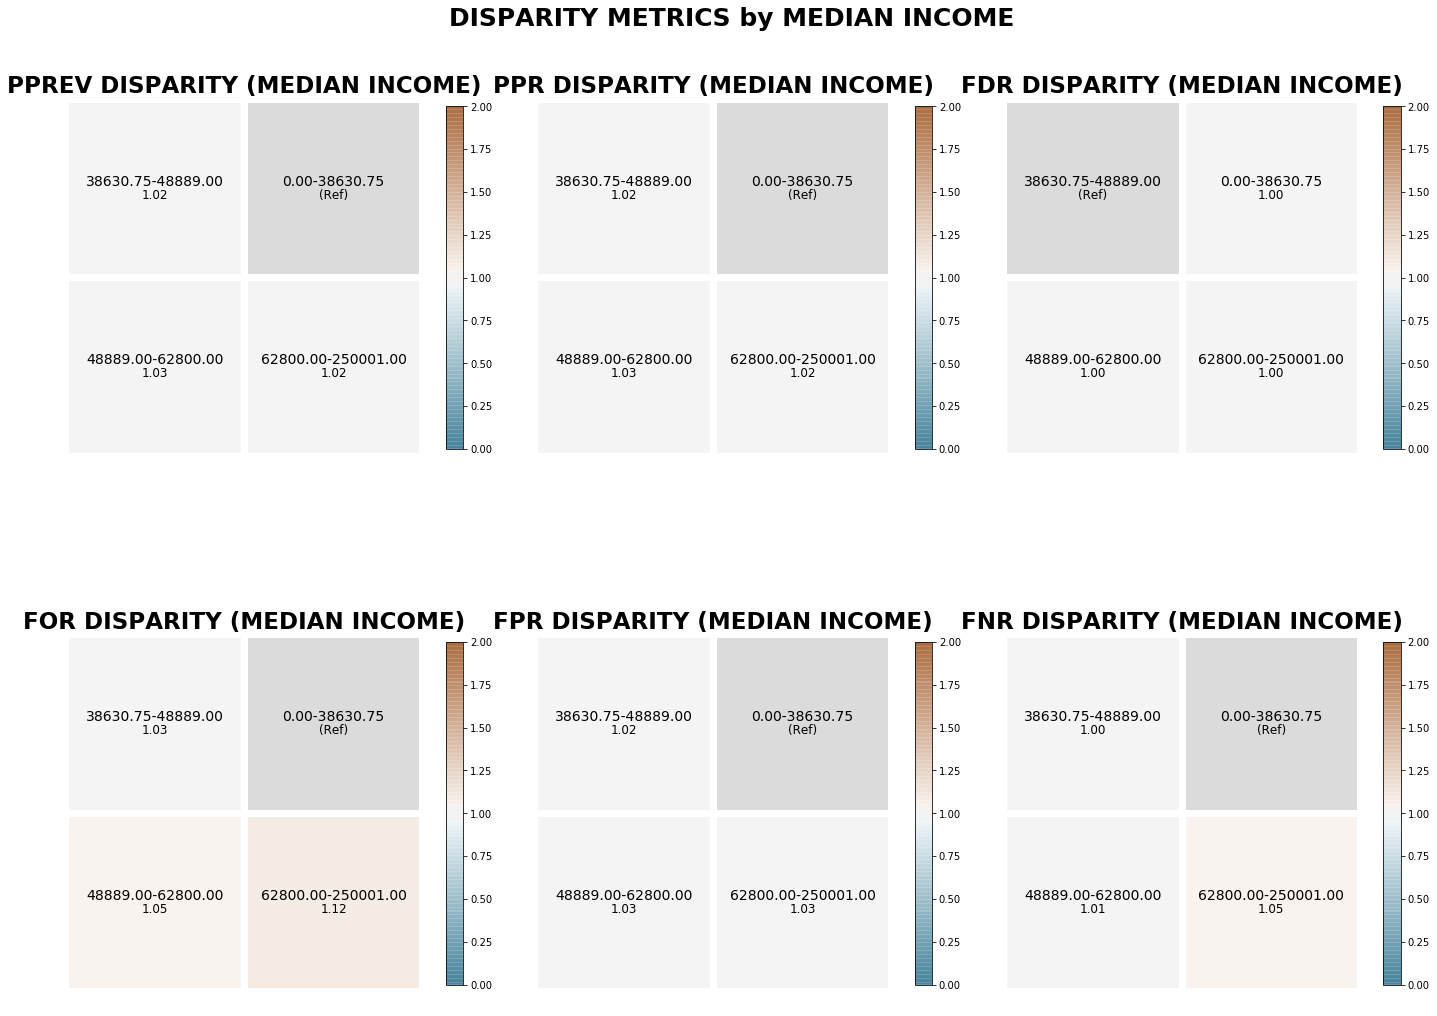

In [70]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['median income'], significance_alpha=0.05)

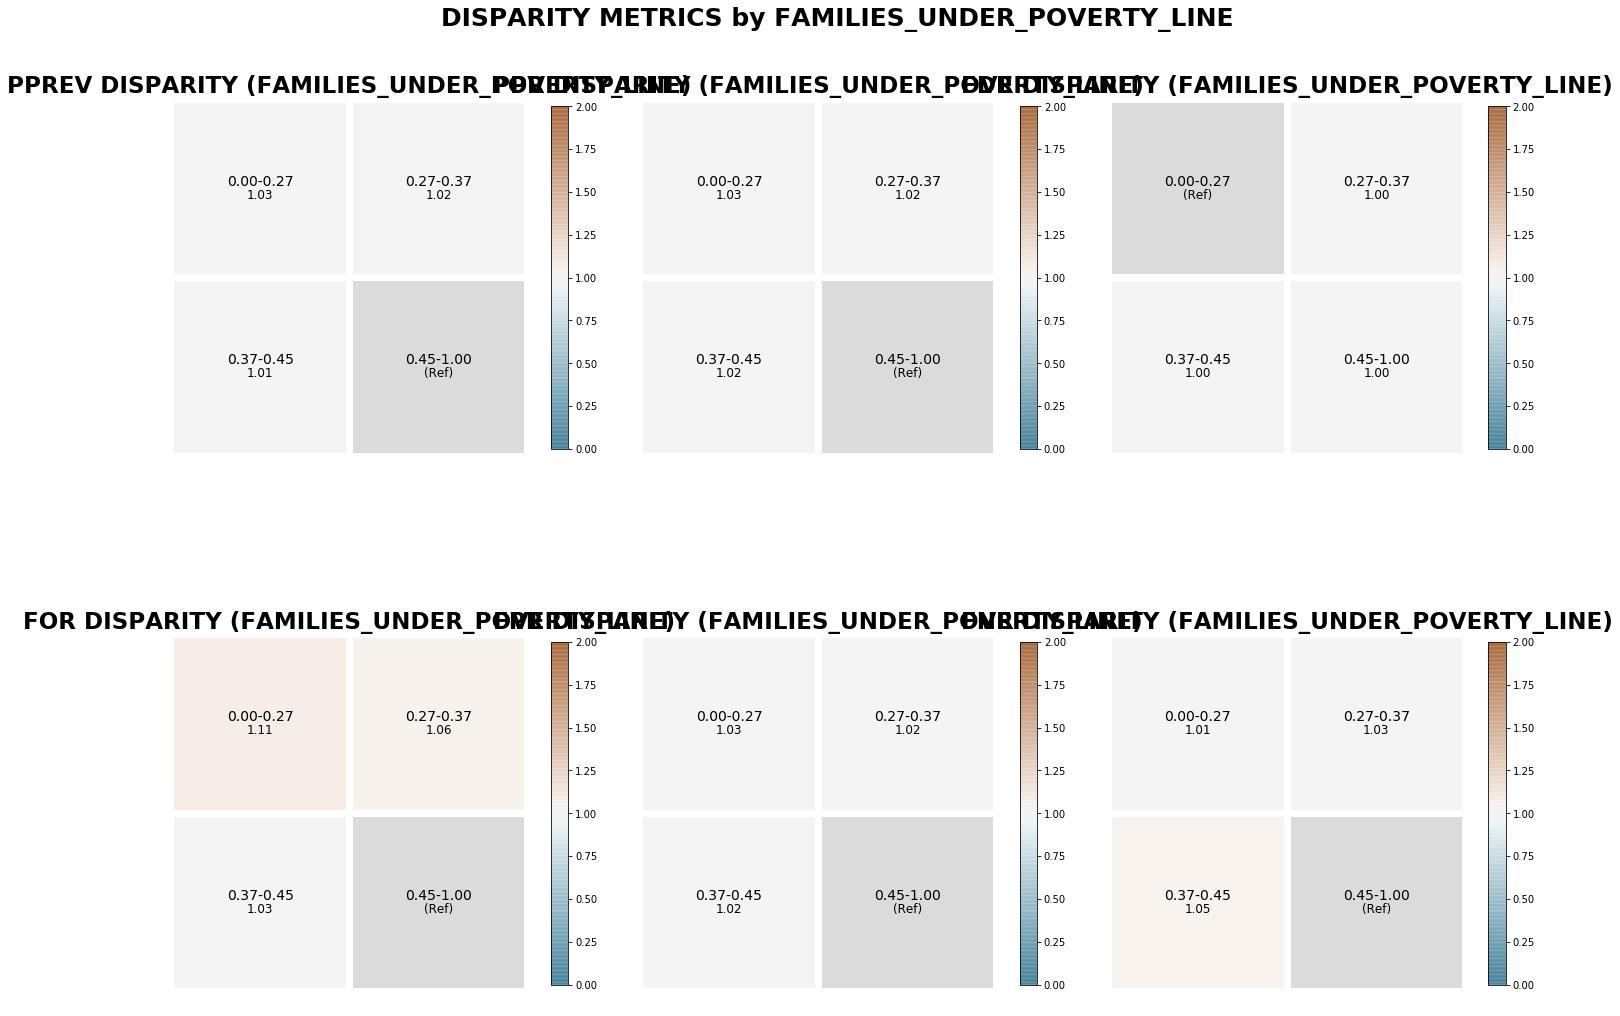

In [71]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['families_under_poverty_line'], significance_alpha=0.05)

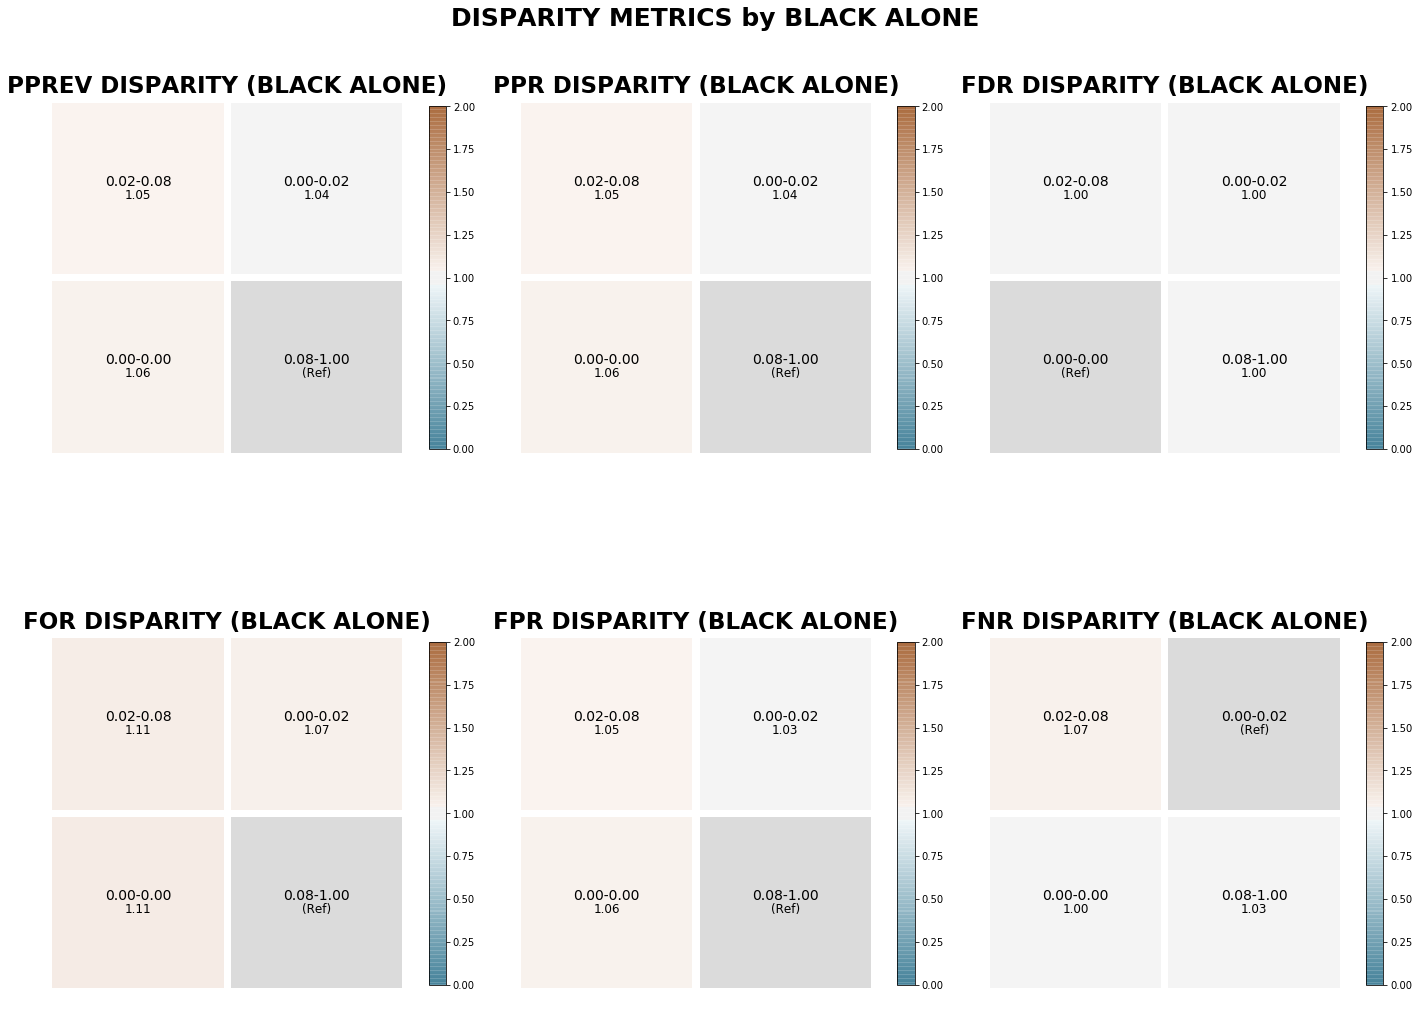

In [72]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['black alone'], significance_alpha=0.05)

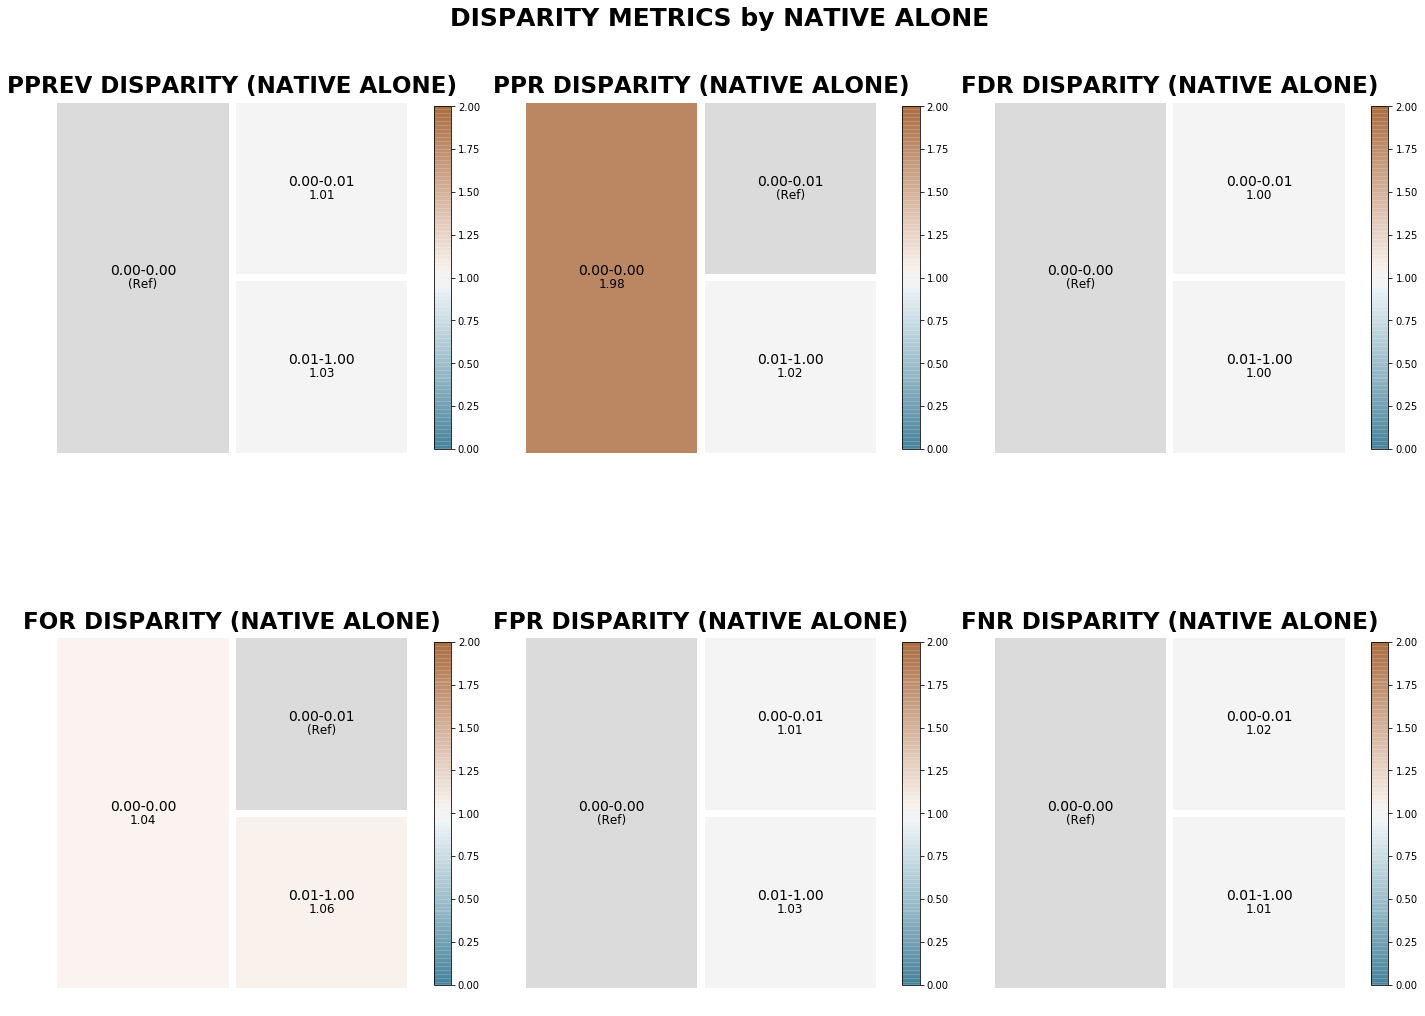

In [73]:
min_met = aqp.plot_disparity_all(min_metric_bdf, attributes=['native alone'], significance_alpha=0.05)

In [ ]:
tm_capped = aqp.plot_disparity_all(hbdf, attributes=['race'], metrics = 'all', significance_alpha=0.05)

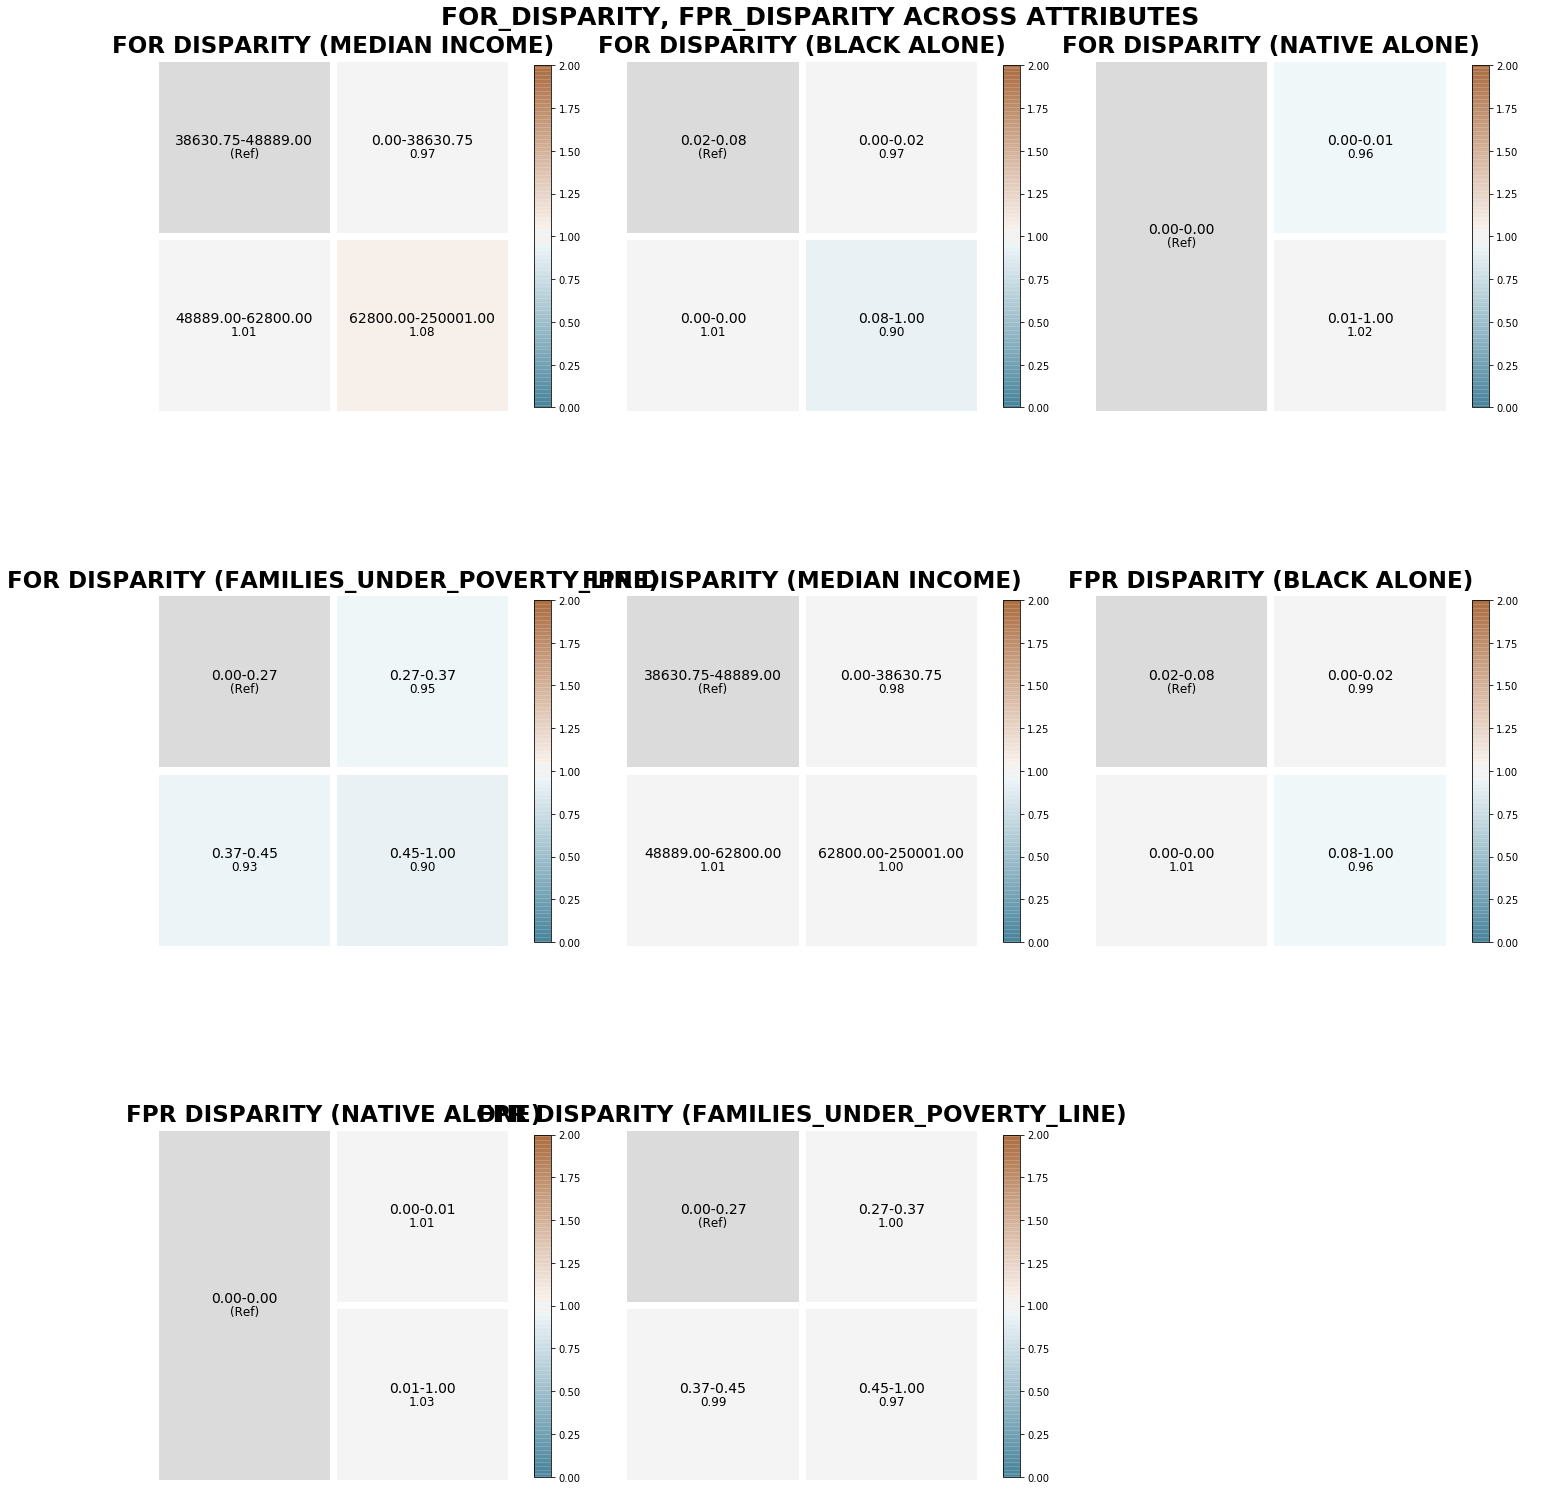

In [74]:
dp = aqp.plot_disparity_all(majority_bdf, metrics=['for_disparity', 'fpr_disparity'], significance_alpha=0.05)

In [75]:
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

In [76]:
parity_detrminations = f.list_parities(fdf)

In [77]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + calculated_disparities + parity_detrminations].style

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,Statistical Parity,Precision Parity,FDR Parity,Supervised Fairness,Unsupervised Fairness,TPR Parity,TNR Parity,FNR Parity,Equalized Odds,FOR Parity,TypeII Parity,TypeI Parity,FPR Parity,Impact Parity,NPV Parity
0,median income,0.00-38630.75,0.386503,0.8534,0.00405281,0.985296,0.1466,0.613497,0.995947,0.0147044,0.245233,0.14795,0.00562871,0.976598,0.976358,1.05179,0.999266,0.892426,0.975305,0.950798,1.08949,1.00437,1.00049,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,median income,38630.75-48889.00,0.386243,0.85036,0.00419302,0.985165,0.14964,0.613757,0.995807,0.0148348,0.250366,0.151013,0.00580006,0.997037,0.996566,1.06112,0.999133,0.9233,0.995531,0.9512,1.08876,1.00079,1.00035,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,median income,48889.00-62800.00,0.380449,0.848521,0.00424807,0.985537,0.151479,0.619551,0.995752,0.0144626,0.253291,0.152809,0.00580893,1.00869,1.00842,1.03449,0.999511,0.935422,1.00776,0.96018,1.07243,0.998627,1.00029,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,median income,62800.00-250001.00,0.354756,0.849688,0.00454134,0.98602,0.150312,0.645244,0.995459,0.0139803,0.25111,0.151533,0.00597166,1,1,1,1,1,1,1,1,1,1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,black alone,0.00-0.00,0.390625,0.847261,0.00442295,0.984448,0.152739,0.609375,0.995577,0.0155515,0.255593,0.154199,0.00613897,1,1,1,1,1,1,1,1,1,1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,black alone,0.00-0.02,0.390939,0.850508,0.00425226,0.984645,0.149492,0.609061,0.995748,0.0153553,0.250162,0.150923,0.00592797,0.97875,0.978754,0.987381,1.0002,0.961408,0.978741,0.999486,1.0008,1.00383,1.00017,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,black alone,0.02-0.08,0.349866,0.848741,0.00439067,0.986858,0.151259,0.650134,0.995609,0.0131417,0.252617,0.152396,0.00572428,0.988355,0.988302,0.84504,1.00245,0.992701,0.990308,1.06689,0.895657,1.00175,1.00003,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,black alone,0.08-1.00,0.373938,0.855457,0.00397096,0.986103,0.144543,0.626062,0.996029,0.0138973,0.241627,0.145785,0.00541808,0.945358,0.945434,0.89363,1.00168,0.897808,0.946337,1.02738,0.95728,1.00967,1.00045,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,native alone,0.00-0.00,0.382114,0.851903,0.0042855,0.98492,0.148097,0.617886,0.995715,0.0150798,0.495548,0.149478,0.005899,1,1,1,1,1,1,1,1,1,1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,native alone,0.00-0.01,0.366806,0.850384,0.00410245,0.986618,0.149616,0.633194,0.995898,0.0133818,0.249984,0.150811,0.00550188,0.50446,1.00892,0.887404,1.00172,0.957288,1.01025,1.02477,0.959939,0.998218,1.00018,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True


In [78]:
gaf = f.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,1,binary 0/1,black alone,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,1,binary 0/1,families_under_poverty_line,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,1,binary 0/1,median income,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,1,binary 0/1,native alone,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True


In [79]:
gof = f.get_overall_fairness(fdf)
gof

{'Unsupervised Fairness': False,
 'Supervised Fairness': True,
 'Overall Fairness': False}

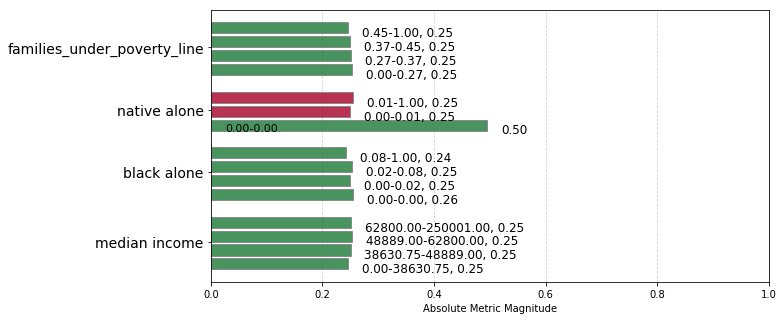

In [80]:
z = aqp.plot_fairness_group(fdf, group_metric='ppr')

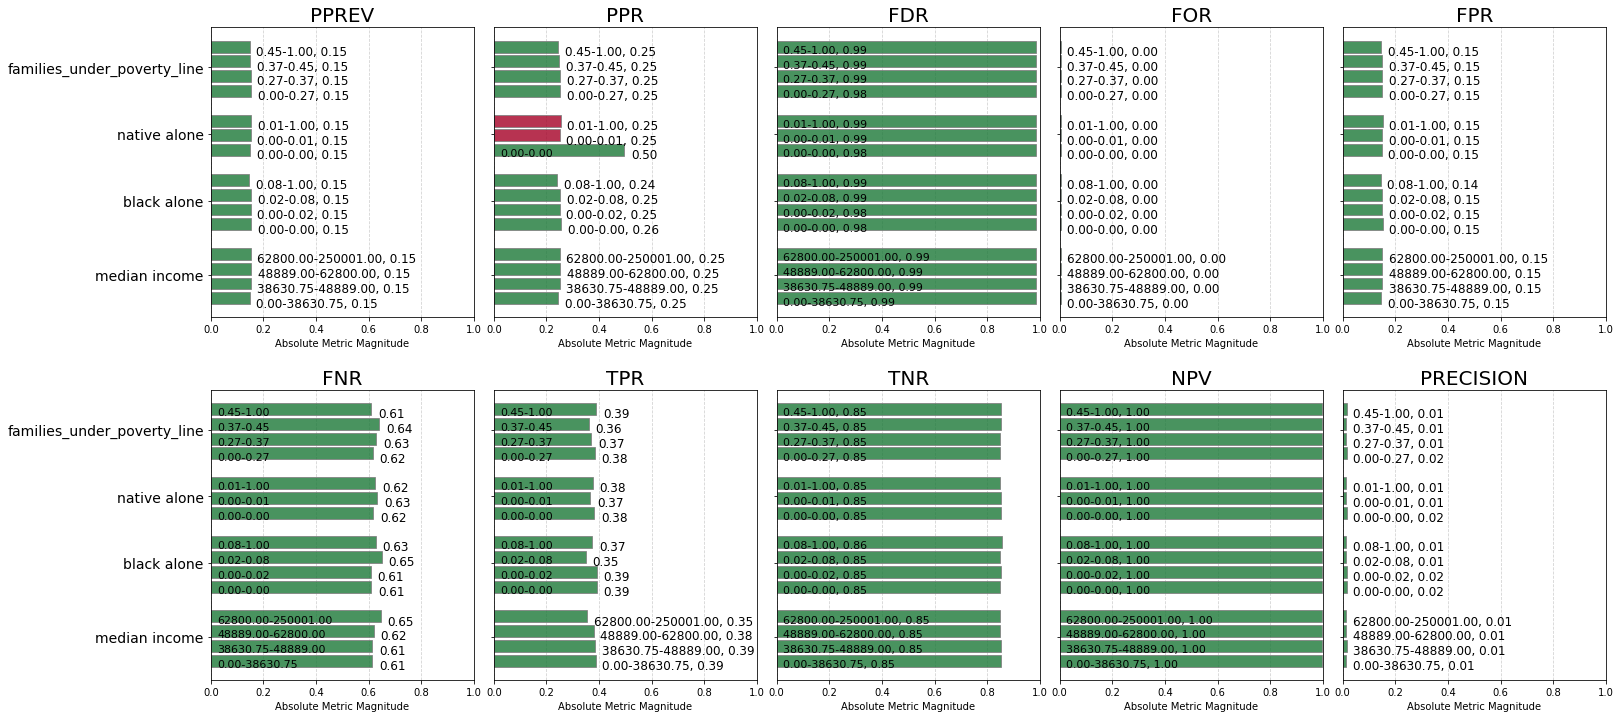

In [81]:
fg = aqp.plot_fairness_group_all(fdf, ncols=5, metrics = "all")

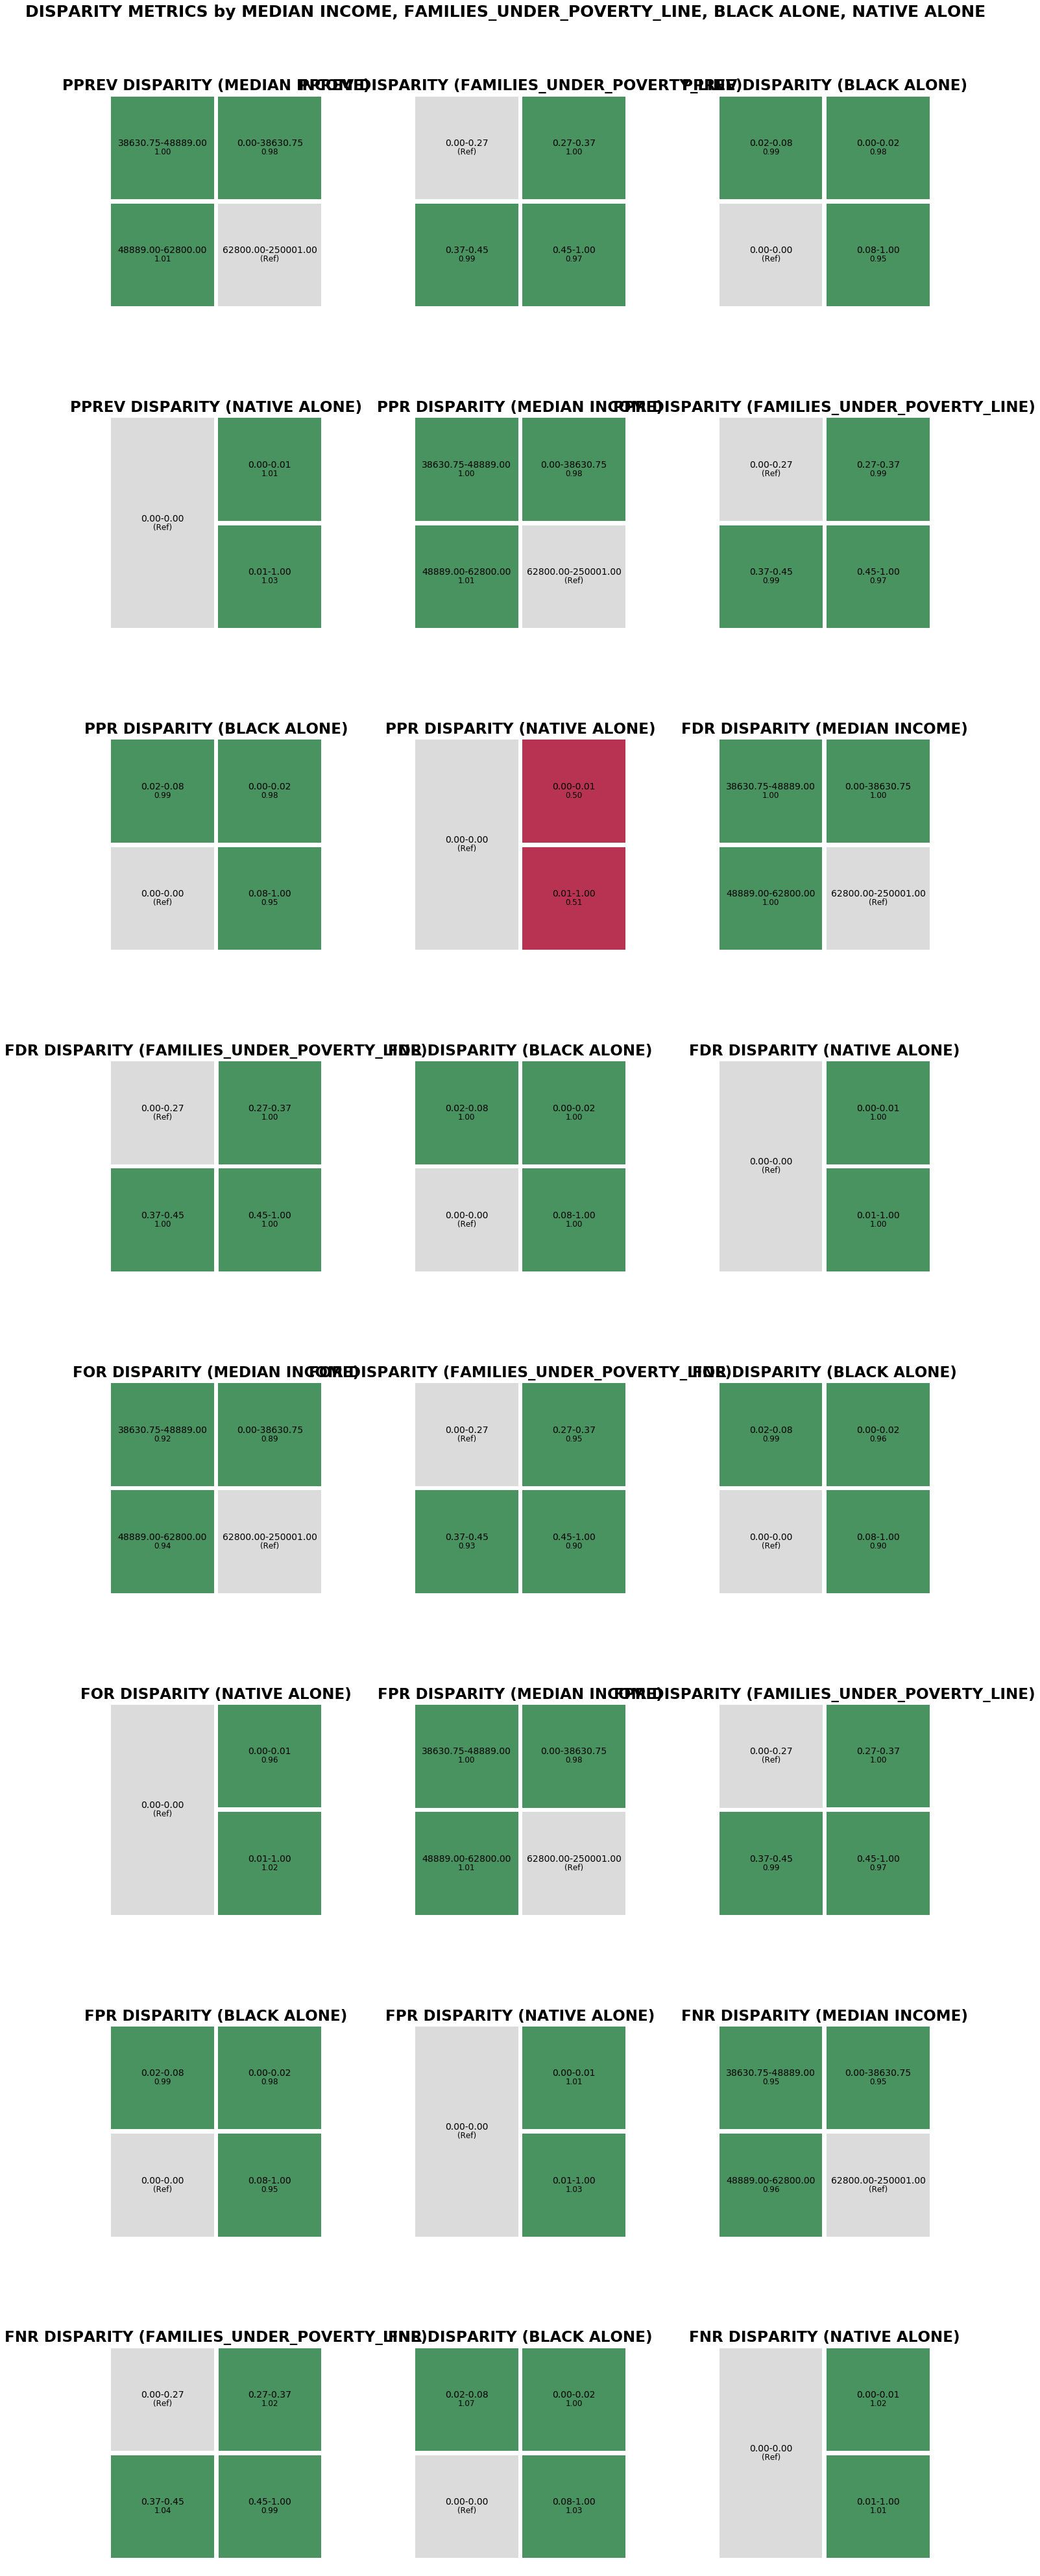

In [82]:
n_tm = aqp.plot_fairness_disparity_all(fdf, attributes=['median income', 'families_under_poverty_line', 'black alone', 'native alone'], 
                                       significance_alpha=0.05)